<a href="https://colab.research.google.com/github/Meemansha-spec/meem.github.io/blob/master/Volcano_eruption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the data and necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('../content/drive/MyDrive/Volcano prediction/train.csv')

In [ ]:
train.head()

,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


In [ ]:
from pylab import rcParams
rcParams ['figure.figsize'] = 12,5

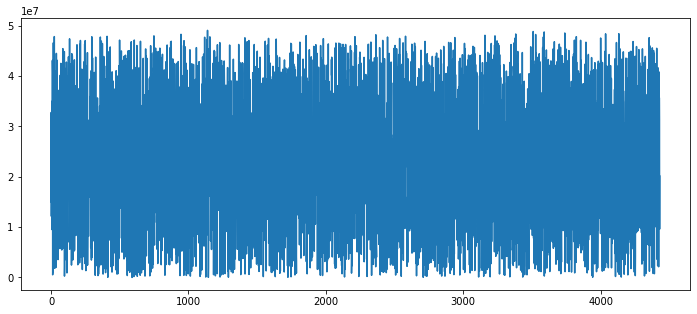

In [ ]:
train['time_to_eruption'].plot()

In [ ]:
train.shape

(4431, 2)

In [ ]:
submission = pd.read_csv('../content/drive/MyDrive/Volcano prediction/sample_submission.csv')

In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   segment_id        4520 non-null   int64
 1   time_to_eruption  4520 non-null   int64
dtypes: int64(2)
memory usage: 70.8 KB


In [ ]:
test = submission['segment_id']

In [ ]:
test=pd.DataFrame(test)

In [ ]:
test.head()

,segment_id
0,1000213997
1,100023368
2,1000488999
3,1001028887
4,1001857862


In [ ]:
sensor_train = pd.read_csv('../content/drive/MyDrive/Volcano prediction/sensor_train.csv')

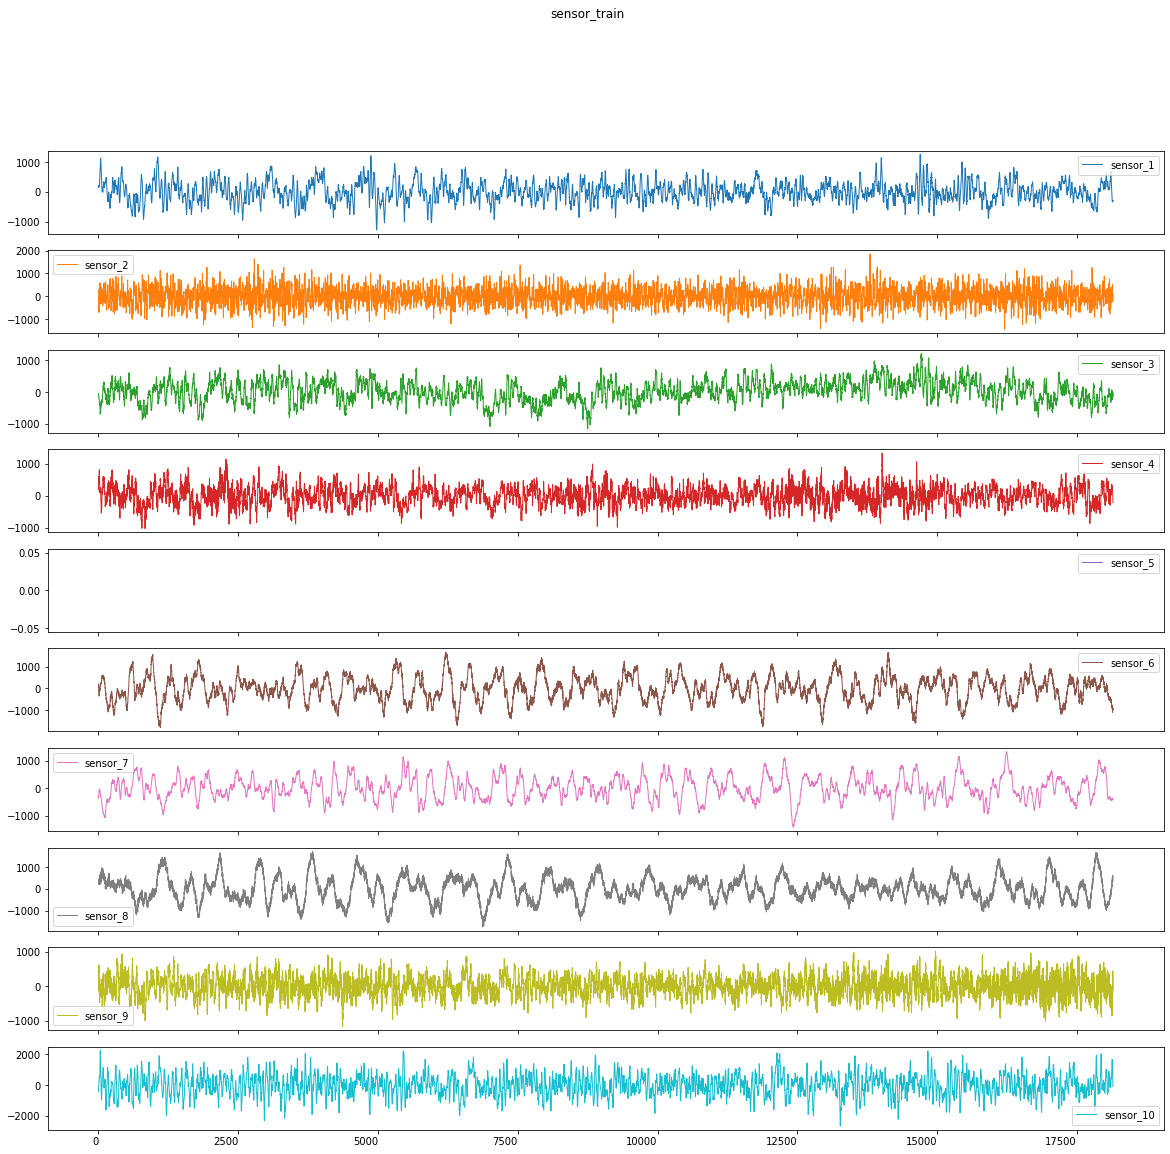

In [ ]:
sensor_train.plot(figsize=(20,20),
                       subplots=True, 
                       layout=(10,1),
                       rot=0, 
                       lw=1, 
                       #colormap='jet',
                       title='sensor_train'
                      )

plt.show();

In [ ]:
sensor_train.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,183.0,290.0,-46.0,186.0,NaN,199.0,-373.0,297.0,-35.0,-434.0
1,153.0,282.0,-52.0,339.0,NaN,131.0,-356.0,192.0,-144.0,-365.0
2,171.0,272.0,-59.0,397.0,NaN,60.0,-313.0,247.0,-99.0,-295.0
3,179.0,213.0,-120.0,434.0,NaN,39.0,-281.0,321.0,110.0,-221.0
4,172.0,64.0,-134.0,444.0,NaN,87.0,-275.0,275.0,339.0,-155.0


In [ ]:
sensor_test = pd.read_csv('../content/drive/MyDrive/Volcano prediction/sensor_test.csv')

In [ ]:
sensor_test.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,170.0,455.0,NaN,-382.0,106.0,252.0,305.0,216.0,-404.0,-1011.0
1,-35.0,567.0,NaN,-446.0,62.0,383.0,331.0,-134.0,-423.0,-934.0
2,180.0,627.0,NaN,-499.0,-49.0,445.0,308.0,-234.0,-447.0,-807.0
3,230.0,549.0,NaN,-539.0,-74.0,272.0,247.0,-151.0,-449.0,-679.0
4,530.0,332.0,NaN,-557.0,-111.0,-95.0,165.0,236.0,-455.0,-608.0


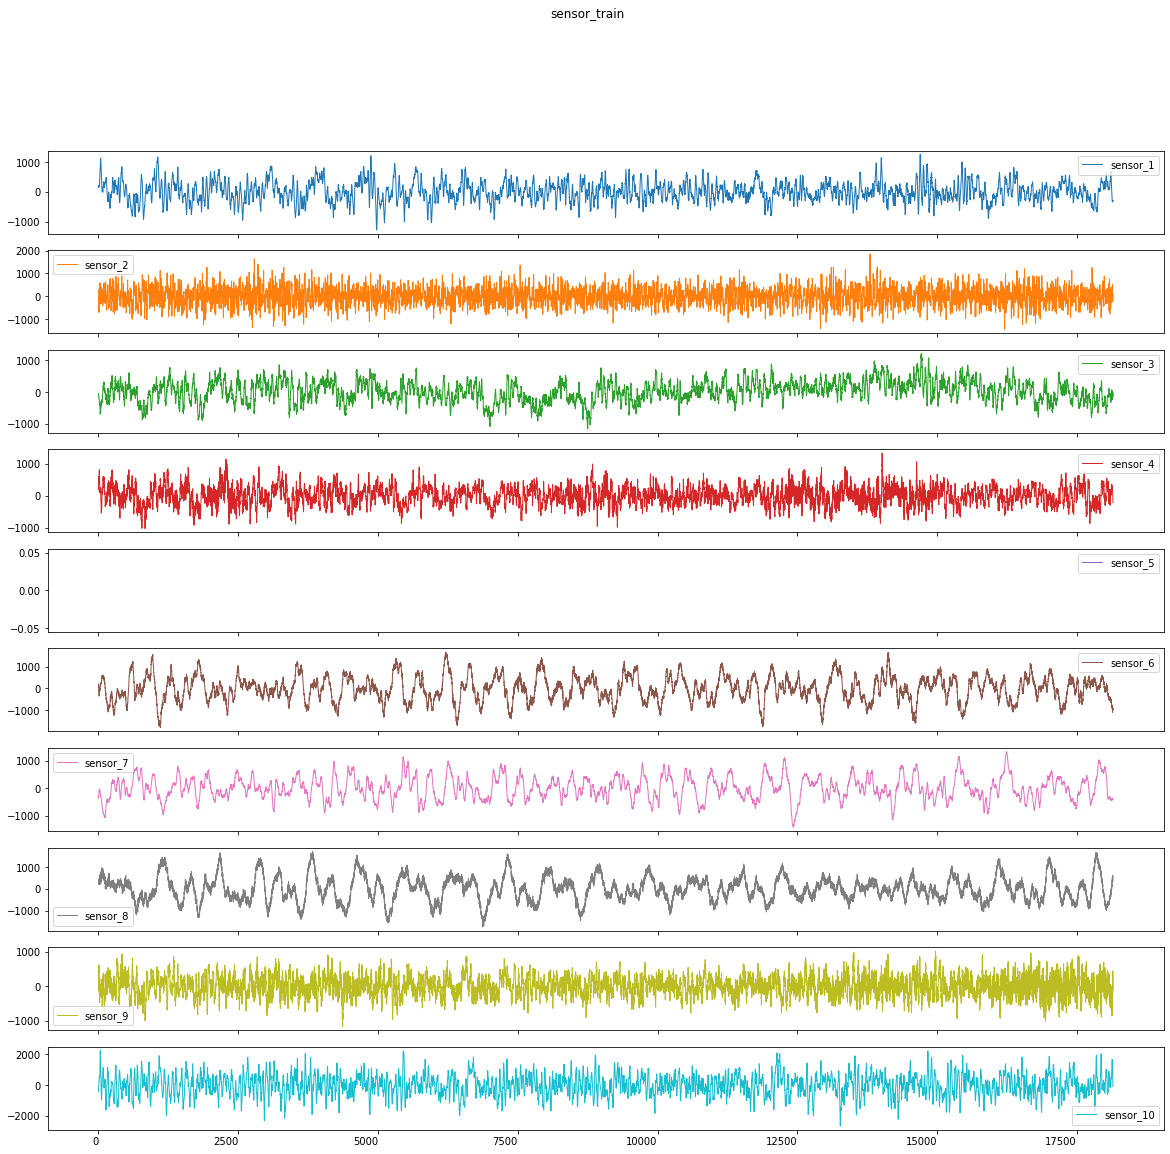

In [ ]:
sensor_train.plot(figsize=(20,20),
                       subplots=True, 
                       layout=(10,1),
                       rot=0, 
                       lw=1, 
                       #colormap='jet',
                       title='sensor_train'
                      )

plt.show();

In [ ]:
train_data = pd.concat([train,sensor_train],axis = 1)

In [ ]:
train_data.head()

,segment_id,time_to_eruption,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.136038e+09,12262005.0,183.0,290.0,-46.0,186.0,NaN,199.0,-373.0,297.0,-35.0,-434.0
1,1.969648e+09,32739612.0,153.0,282.0,-52.0,339.0,NaN,131.0,-356.0,192.0,-144.0,-365.0
2,1.895880e+09,14965999.0,171.0,272.0,-59.0,397.0,NaN,60.0,-313.0,247.0,-99.0,-295.0
3,2.068207e+09,26469720.0,179.0,213.0,-120.0,434.0,NaN,39.0,-281.0,321.0,110.0,-221.0
4,1.929556e+08,31072429.0,172.0,64.0,-134.0,444.0,NaN,87.0,-275.0,275.0,339.0,-155.0


In [ ]:
test_data = pd.concat([test , sensor_test],axis = 1)

In [ ]:
test_data.head()

,segment_id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.000214e+09,170.0,455.0,NaN,-382.0,106.0,252.0,305.0,216.0,-404.0,-1011.0
1,1.000234e+08,-35.0,567.0,NaN,-446.0,62.0,383.0,331.0,-134.0,-423.0,-934.0
2,1.000489e+09,180.0,627.0,NaN,-499.0,-49.0,445.0,308.0,-234.0,-447.0,-807.0
3,1.001029e+09,230.0,549.0,NaN,-539.0,-74.0,272.0,247.0,-151.0,-449.0,-679.0
4,1.001858e+09,530.0,332.0,NaN,-557.0,-111.0,-95.0,165.0,236.0,-455.0,-608.0


In [ ]:
train_data.isna().sum()

segment_id          13714
time_to_eruption    13714
sensor_1                0
sensor_2                0
sensor_3                0
sensor_4                0
sensor_5            18145
sensor_6                0
sensor_7                0
sensor_8                0
sensor_9                0
sensor_10               0
dtype: int64

In [ ]:
test_data.isna().sum()

segment_id    31579
sensor_1          0
sensor_2          0
sensor_3      36099
sensor_4          0
sensor_5          0
sensor_6          0
sensor_7          1
sensor_8          1
sensor_9          1
sensor_10         1
dtype: int64

In [ ]:
for label, content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            
            # Fill missing numeric values with median
            train_data[label] = content.fillna(content.median())

In [ ]:
train_data.isna().sum()

segment_id              0
time_to_eruption        0
sensor_1                0
sensor_2                0
sensor_3                0
sensor_4                0
sensor_5            18145
sensor_6                0
sensor_7                0
sensor_8                0
sensor_9                0
sensor_10               0
dtype: int64

In [ ]:
train_data.head()

,segment_id,time_to_eruption,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.136038e+09,12262005.0,183.0,290.0,-46.0,186.0,NaN,199.0,-373.0,297.0,-35.0,-434.0
1,1.969648e+09,32739612.0,153.0,282.0,-52.0,339.0,NaN,131.0,-356.0,192.0,-144.0,-365.0
2,1.895880e+09,14965999.0,171.0,272.0,-59.0,397.0,NaN,60.0,-313.0,247.0,-99.0,-295.0
3,2.068207e+09,26469720.0,179.0,213.0,-120.0,434.0,NaN,39.0,-281.0,321.0,110.0,-221.0
4,1.929556e+08,31072429.0,172.0,64.0,-134.0,444.0,NaN,87.0,-275.0,275.0,339.0,-155.0


In [ ]:
train_data.shape

(18145, 12)

In [ ]:
for label, content in test_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            
            # Fill missing numeric values with median
            test_data[label] = content.fillna(content.median())

In [ ]:
test_data.head()

,segment_id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.000214e+09,170.0,455.0,NaN,-382.0,106.0,252.0,305.0,216.0,-404.0,-1011.0
1,1.000234e+08,-35.0,567.0,NaN,-446.0,62.0,383.0,331.0,-134.0,-423.0,-934.0
2,1.000489e+09,180.0,627.0,NaN,-499.0,-49.0,445.0,308.0,-234.0,-447.0,-807.0
3,1.001029e+09,230.0,549.0,NaN,-539.0,-74.0,272.0,247.0,-151.0,-449.0,-679.0
4,1.001858e+09,530.0,332.0,NaN,-557.0,-111.0,-95.0,165.0,236.0,-455.0,-608.0


In [ ]:
train_data.shape , test_data.shape

((18145, 12), (36099, 11))

In [ ]:
X = train_data.drop(['segment_id','time_to_eruption'],axis = 1)
y = train_data['time_to_eruption']

In [ ]:
X.isna().sum()

sensor_1         0
sensor_2         0
sensor_3         0
sensor_4         0
sensor_5     18145
sensor_6         0
sensor_7         0
sensor_8         0
sensor_9         0
sensor_10        0
dtype: int64

In [ ]:
X

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,183.0,290.0,-46.0,186.0,NaN,199.0,-373.0,297.0,-35.0,-434.0
1,153.0,282.0,-52.0,339.0,NaN,131.0,-356.0,192.0,-144.0,-365.0
2,171.0,272.0,-59.0,397.0,NaN,60.0,-313.0,247.0,-99.0,-295.0
3,179.0,213.0,-120.0,434.0,NaN,39.0,-281.0,321.0,110.0,-221.0
4,172.0,64.0,-134.0,444.0,NaN,87.0,-275.0,275.0,339.0,-155.0
...,...,...,...,...,...,...,...,...,...,...
18140,-298.0,-232.0,-170.0,-6.0,NaN,-977.0,-434.0,351.0,133.0,183.0
18141,-300.0,-218.0,-60.0,-124.0,NaN,-898.0,-435.0,439.0,443.0,57.0
18142,-308.0,-142.0,-102.0,-148.0,NaN,-888.0,-425.0,371.0,252.0,-32.0
18143,-305.0,-4.0,-65.0,-162.0,NaN,-1014.0,-411.0,578.0,-106.0,-74.0


In [ ]:
y

0        12262005.0
1        32739612.0
2        14965999.0
3        26469720.0
4        31072429.0
            ...    
18140    22465586.0
18141    22465586.0
18142    22465586.0
18143    22465586.0
18144    22465586.0
Name: time_to_eruption, Length: 18145, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


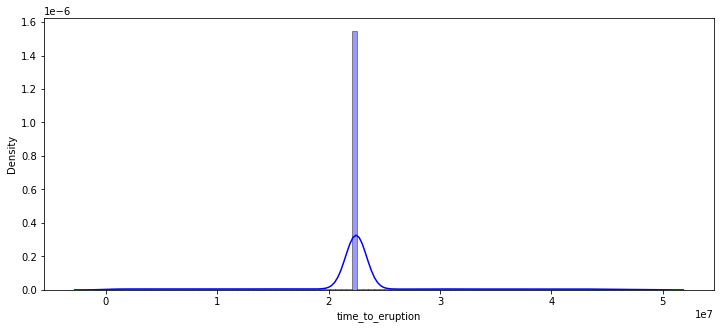

In [ ]:
sns.distplot(train_data['time_to_eruption'], 
             hist=True, 
             kde=True, 
             bins=100, 
             color = 'blue', 
             hist_kws={'edgecolor':'black'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


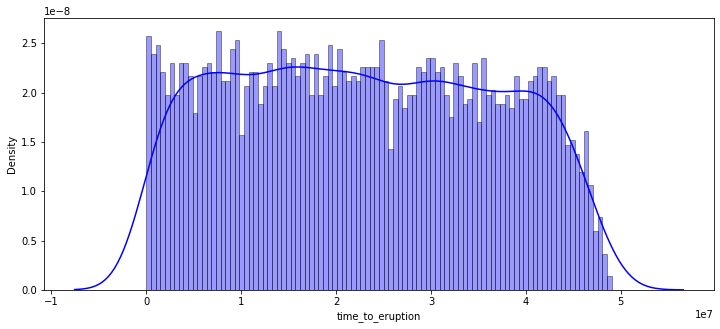

In [ ]:
sns.distplot(train['time_to_eruption'], 
             hist=True, 
             kde=True, 
             bins=100, 
             color = 'blue', 
             hist_kws={'edgecolor':'black'})

## Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [ ]:
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
params = {
    'boosting_type': 'gbdt', 
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.1,
    'n_estimators': 100, 
    'subsample_for_bin': 200, # 200000 is default 
    #'objective': 'binary'
    'min_split_gain': 0.5,    # 0.0 is default 
    'min_child_weight': 1e-3, 
    'min_child_samples': 20,
    'subsample': 1,
    'colsample_bytree': 1.0,
    'min_data_in_leaf': 20,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'random_state': 42
    #'device': 'cpu', # you can use GPU to achieve faster learning
}

model_lgbm_regr = LGBMRegressor(boosting_type = params['boosting_type'], 
                                num_leaves = params['num_leaves'],
                                max_depth = params['max_depth'],
                                learning_rate = params['learning_rate'],
                                n_estimators = params['n_estimators'],
                                subsample_for_bin = params['subsample_for_bin'],
                                #objective = params['objective'],
                                min_split_gain = params['min_split_gain'], 
                                min_child_weight = params['min_child_weight'], 
                                min_child_samples = params['min_child_samples'],
                                subsample = params['subsample'],
                                colsample_bytree = params['colsample_bytree'],
                                min_data_in_leaf = params['min_data_in_leaf'],
                                feature_fraction = params['feature_fraction'],
                                bagging_fraction = params['bagging_fraction'],
                                random_state = params['random_state'],
                                #n_jobs = 5, 
                                silent = True
                               )

# To view the default model parameters:
model_lgbm_regr.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'min_data_in_leaf', 'feature_fraction', 'bagging_fraction'])

In [ ]:
model_lgbm_regr.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=1.0, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.5, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1, subsample_for_bin=200,
              subsample_freq=0)

## Grid search

In [ ]:
gridParams = {
    'boosting_type' : ['gbdt', 'dart'], # for better accuracy might try dart, check both
    'num_leaves': [10,31,50],        # large num_leaves helps improve accuracy but might lead to over-fitting
    'max_depth': [10,-1],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample_for_bin': [200],
    'objective' : ['binary'],
    'min_split_gain': [0.5],    # 0.0 is default 
    'min_child_weight': [1e-3], 
    'min_child_samples': [20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_data_in_leaf': [10, 20],
    'feature_fraction': [0.8, 1.0],
    'bagging_fraction': [0.8, 1.0],
    'random_state' : [42],
    }
grid = GridSearchCV(model_lgbm_regr, 
                    gridParams, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1)

# Run the grid
grid.fit(X_train, y_train)



Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 3388 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 6188 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9788 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 11520 out of 11520 | elapsed:  2.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMRegressor(bagging_fraction=1.0, boosting_type='gbdt',
                                     class_weight=None, colsample_bytree=1.0,
                                     feature_fraction=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001,
                                     min_data_in_leaf=20, min_split_gain=0.5,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=N...
                         'learning_rate': [0.01, 0.1], 'max_depth': [10, -1],
                         'min_child_samples': [20], 'min_child_weight': [0.001],
                         'min_data_in_leaf': [10, 20], 'min_split_gain': [0.5],
                         'n_estimators': [50, 100, 200],
                        

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'bagging_fraction': 0.8, 'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'feature_fraction': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_data_in_leaf': 10, 'min_split_gain': 0.5, 'n_estimators': 50, 'num_leaves': 10, 'objective': 'binary', 'random_state': 42, 'subsample': 0.8, 'subsample_for_bin': 200}
-11.494951261786415


## Best model selection

In [ ]:
params['boosting_type'] = grid.best_params_['boosting_type']
params['num_leaves'] = grid.best_params_['num_leaves']
params['max_depth'] = grid.best_params_['max_depth']
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']
params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']
params['objective'] = grid.best_params_['objective']
params['min_split_gain'] = grid.best_params_['min_split_gain']
params['min_child_weight'] = grid.best_params_['min_child_weight']
params['min_child_samples'] = grid.best_params_['min_child_samples']
params['subsample'] = grid.best_params_['subsample']
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['min_data_in_leaf'] = grid.best_params_['min_data_in_leaf']
params['feature_fraction'] = grid.best_params_['feature_fraction']
params['bagging_fraction'] = grid.best_params_['bagging_fraction']
params['random_state'] = grid.best_params_['random_state']

In [ ]:
model_lgbm_regr.fit(X_train, y_train, 
                  eval_set= [(X_train, y_train), (X_test, y_test)], 
                    eval_metric="mae", 
                    verbose=200, 
                    early_stopping_rounds=50
                   )

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	training's l2: 4.43678e+13	training's l1: 2.9344e+06	valid_1's l2: 4.38291e+13	valid_1's l1: 2.88108e+06


LGBMRegressor(bagging_fraction=1.0, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.5, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1, subsample_for_bin=200,
              subsample_freq=0)

In [ ]:
dtrain = lgbm.Dataset(X_train, label=y_train)
dtest = lgbm.Dataset(X_test, label=y_test) 

In [ ]:
model_lgbm = lgbm.train(params, 
                        train_set=dtrain, 
                        num_boost_round=100, 
                        valid_sets=[dtest, dtrain], 
                        early_stopping_rounds=20, 
                        verbose_eval=4
                       )

Training until validation scores don't improve for 20 rounds.
[4]	training's binary_logloss: 0	valid_0's binary_logloss: 0
[8]	training's binary_logloss: 0	valid_0's binary_logloss: 0
[12]	training's binary_logloss: 0	valid_0's binary_logloss: 0
[16]	training's binary_logloss: 0	valid_0's binary_logloss: 0
[20]	training's binary_logloss: 0	valid_0's binary_logloss: 0
Early stopping, best iteration is:
[1]	training's binary_logloss: 0	valid_0's binary_logloss: 0


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [ ]:
model_lgbm

In [ ]:
test_data

,segment_id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10
0,1.000214e+09,170.0,455.0,NaN,-382.0,106.0,252.0,305.0,216.0,-404.0,-1011.0
1,1.000234e+08,-35.0,567.0,NaN,-446.0,62.0,383.0,331.0,-134.0,-423.0,-934.0
2,1.000489e+09,180.0,627.0,NaN,-499.0,-49.0,445.0,308.0,-234.0,-447.0,-807.0
3,1.001029e+09,230.0,549.0,NaN,-539.0,-74.0,272.0,247.0,-151.0,-449.0,-679.0
4,1.001858e+09,530.0,332.0,NaN,-557.0,-111.0,-95.0,165.0,236.0,-455.0,-608.0
...,...,...,...,...,...,...,...,...,...,...,...
36094,1.060695e+09,-64.0,-9.0,NaN,-41.0,-68.0,-701.0,200.0,861.0,66.0,190.0
36095,1.060695e+09,-136.0,27.0,NaN,-149.0,-30.0,-660.0,119.0,674.0,67.0,244.0
36096,1.060695e+09,-333.0,58.0,NaN,-259.0,-47.0,-486.0,-18.0,432.0,66.0,321.0
36097,1.060695e+09,-366.0,82.0,NaN,-334.0,-4.0,-523.0,-1.0,399.0,115.0,414.0


In [ ]:
predictions = model_lgbm_regr.predict(test_data.drop(columns=['segment_id']))
predictions  = model_lgbm.predict(test_data.drop(columns=['segment_id']))


In [ ]:
y_preds = model_lgbm_regr.predict(X_train)


## Find the error

In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_train , y_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6660919.0281536095

In [ ]:
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
submit = pd.DataFrame()
submit['segment_id'] = test_data["segment_id"]
submit['time_to_eruption'] = predictions


In [ ]:
submit = submit[:4520]

In [ ]:
submit

,segment_id,time_to_eruption
0,1.000214e+09,1.0
1,1.000234e+08,1.0
2,1.000489e+09,1.0
3,1.001029e+09,1.0
4,1.001858e+09,1.0
...,...,...
4515,9.967043e+08,1.0
4516,9.976308e+08,1.0
4517,9.980721e+08,1.0
4518,9.981369e+08,1.0


In [ ]:
submit_P = submit.astype(int)

In [ ]:
submit_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   segment_id        4520 non-null   int64
 1   time_to_eruption  4520 non-null   int64
dtypes: int64(2)
memory usage: 70.8 KB


In [ ]:
submit_P.to_csv('../content/drive/MyDrive/Volcano prediction/submit_P.csv', header=True, index=False)

In [ ]:
submit_P = pd.read_csv('../content/drive/MyDrive/Volcano prediction/submit_P.csv')

In [ ]:
submit_P.head()

,segment_id,time_to_eruption
0,1000213997,0
1,100023368,0
2,1000488999,0
3,1001028887,0
4,1001857862,0


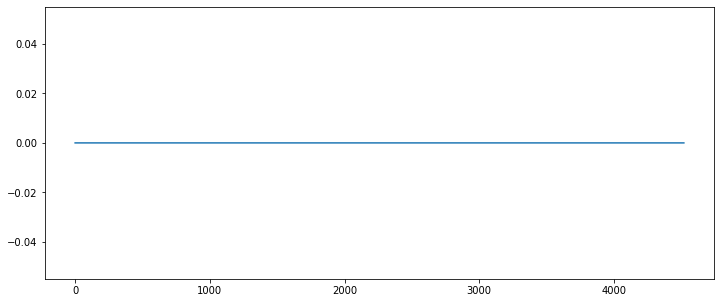

In [ ]:
submit_P['time_to_eruption'].plot();